# Phys 195 - Coding Lab 3
## Simulations using Force

Your name:

Name(s) of lab partners:

# Introduction

In some cases, forces (combined with Newton's 2nd Law) provides a more straightforward way to simulate motion than conservation of energy. Turning points are handled with no problems. (Mathematically this is because we no longer have to take a square root and manually decide whether that square root is positive or negative.)

In [1]:
import math # includes functions like math.sqrt, math.pow
import numpy as np # fast numerical functions on lists
import matplotlib.pyplot as plt # plotting functions

In [2]:
def freefall(yi,vi,ti,tf,dt): # define a function to compute the motion of a free-falling object.
    # yi, vi are initial position and velocity; ti, tf are initial and final times; dt is the timestep.
    # returns: (t,v,y) lists of times, velocities, and y-values
    (t, v, y) = (ti, vi, yi)
    t_list = [t] # start lists for keeping track of values over time
    v_list = [v]
    y_list = [y]
    m = 1 # kg; doesn't matter for free-fall but might for other types of motion
    g = 9.8 # m/s^2; constant gravitational field near surface of Earth
    while t < tf: # keep repeating the indented code until time is up
        y = y + v*dt # move a bit assuming constant velocity
        F = -m*g # compute the force using the near-Earth gravitational field
        a = F/m # compute the acceleration from N2
        v = v + a*dt # update the velocity by accelerating at -g
        t = t + dt
        t_list.append(t) # add the current values to the lists
        v_list.append(v)
        y_list.append(y)
    return (t_list, v_list, y_list) # return the lists as the output of the function

In [5]:
(t,v,y) = freefall(0,10,0,2.5,0.01) # run the calculation and get lists for t, v, y for the specified initial conditions

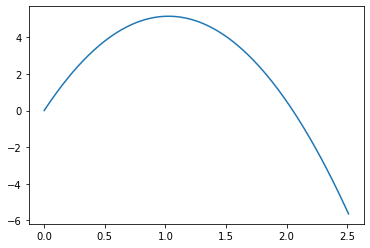

In [6]:
plt.plot(t,y)

Note that the object reaches its maximum height and cleanly turns around, whereas the code we wrote last time using energy had to stop calculating at that point.

# Simple Harmonic Oscillator (again)

**Exercise 1:** Copy the `freefall` function above and modify it to simulate a mass on a spring. Last time we used the spring potential energy, U(y)=1/2 ky^2. This time, use the spring *force*, F=-ky. (These formulas assume that the spring oscillates along the y-axis, but we're ignoring gravity, so there's no difference from oscillating horizontally.)

In [ ]:
def spring(yi,vi,ti,tf,dt): # define a function to compute the motion of a mass on a spring.
    # your code here!

**Exercise 2:** Use your code to compute and plot the motion of a spring which is initially stretched and released from rest. (This matches the scenario we developed in class with phase shift $\delta=0$.) Verify that your result looks like a cosine function. Finally, determine the period T of the oscillation (either by reading from the plot, or writing more code, your choice) and verify that it matches our predicted value of $T=2\pi \sqrt{m/k}$. Quadruple the values of m and k (one at a time) and make sure that the period doubles or halves as predicted.

In [ ]:
# your code and plots here

(your commentary here)

# Numerical Accuracy

Numerical solutions to physics problems are necessarily approximate. There are two sources of errors: our own approximations (assuming the acceleration and/or velocity are constant during short periods of time) and numerical error (because computers can only work with a certain number of digits at a time, rounding errors are introduced and build up over more and more iterations of a calculation). The first type of uncertainty can be reduced by using a smaller time interval dt, but this makes the second type of uncertainty worse because more tiny rounding errors can be introduced.

**Exercise 3:** Numerical accuracy can also be affected by *very subtle* changes in your code. First, generate a plot using your `spring` function over a very long time interval---tens or hundreds of oscillations. See if the amplitude grows or shrinks over time. (If you copied the `freefall` code very carefully, it shouldn't.) Then define a modified function `spring2` which is exactly the same except that it calculates the force *before* updating the position. (This doesn't seem like it should matter much, right?) Compare your results over many oscillations, and comment on the difference in how the amplitude behaves. What conservation law is being violated by our approximation?

In [ ]:
# your code here, including plots and spring2 function

(your commentary here)

(Extra commentary: the original order (update position, then compute acceleration, then update velocity) is an example of a 'symplectic algorithm' that does a better job of preserving conserved quantities, but might do a worse job at capturing some other aspects of the motion such as oscillation frequency. There are also higher-order algorithms that make use of better approximations than our constant-velocity/constant-acceleration time steps. But, the simplest symplectic algorithm does a pretty good job.)

# Damped Oscillators

**Exercise 4:** Define yet another function `spring3` that includes the effects of air resistance or other drag force on the oscillations. This should, in principle, make a more realistic model of a mass on a spring, that results in the mass slowing down and reaching equilibrium. Assume the drag force has the form $$F_{\rm drag} = -bv$$ where b is some positive constant.

Try different values of b; see if you can make a system that oscillates about 10 times before its amplitude has decayed significantly, and try making a system that *never* oscillates---just slides back to equilibrium without overshooting.

Discuss how the different values of b make this happen.

In [ ]:
# your code here, including definition of spring3 function

(your commentary here)

# Submit

Once you have completed all 4 exercises with code that runs properly (and written discussion answers as appropriate), make sure that your name is at the top of the file. Then, making sure the notebook is saved, "File > Download" (you should get a .ipynb file), rename it to `lastname_195_lab_3.ipynb`, and email it to me (tdwiser@truman.edu) with the subject line "Coding Lab 3 Submission."

Note that you will (probably) not be able to open this file by double-clicking on it, because Windows doesn't recognize this file type. You can reopen it from inside Jupyter Notebook to make sure the contents are saved and correct.